In [1675]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [1676]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [1677]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

In [1678]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1679]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1680]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1681]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1682]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"de Pelsmaeker, Mr. Alfons",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [1683]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1684]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1685]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1686]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


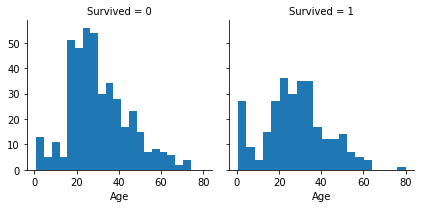

In [1687]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

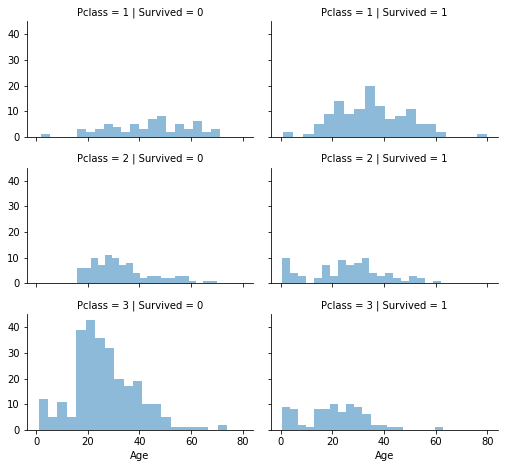

In [1688]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


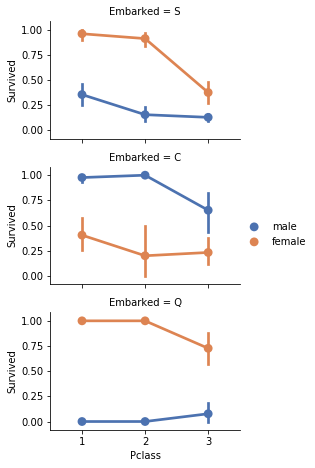

In [1689]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=None, hue_order=None)
grid.add_legend()

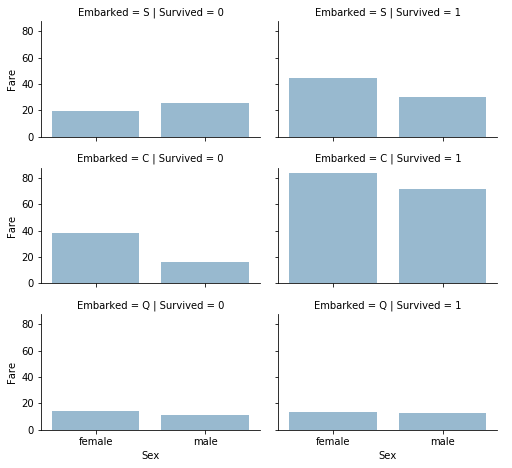

In [1690]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=None)
grid.add_legend()

In [1691]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [1692]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1693]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [1694]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1


In [1695]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [1696]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


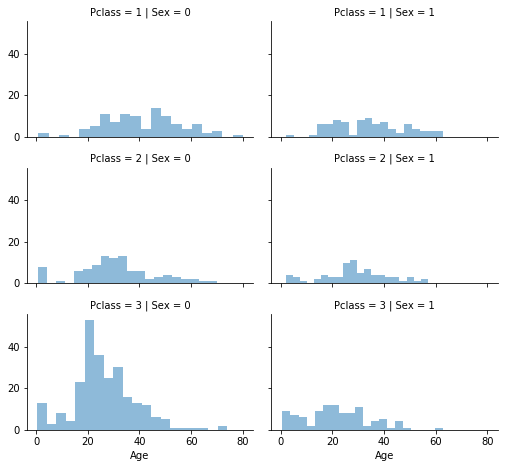

In [1697]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [1698]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [1699]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,7.2500,NaN,S,1
1,1,1,1,38,1,0,71.2833,C85,C,3
2,1,3,1,26,0,0,7.9250,NaN,S,2
3,1,1,1,35,1,0,53.1000,C123,S,3
4,0,3,0,35,0,0,8.0500,NaN,S,1


In [1700]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [1701]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,NaN,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C85,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,NaN,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,C123,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,NaN,S,1,"(32.0, 48.0]"


In [1702]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,7.2500,NaN,S,1
1,1,1,1,2,1,0,71.2833,C85,C,3
2,1,3,1,1,0,0,7.9250,NaN,S,2
3,1,1,1,2,1,0,53.1000,C123,S,3
4,0,3,0,2,0,0,8.0500,NaN,S,1


In [1703]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [1704]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,NaN,S,1,2
1,1,1,1,2,1,0,71.2833,C85,C,3,2
2,1,3,1,1,0,0,7.9250,NaN,S,2,1
3,1,1,1,2,1,0,53.1000,C123,S,3,2
4,0,3,0,2,0,0,8.0500,NaN,S,1,1


In [1705]:
train_df[['SibSp', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,SibSp
0,0,0.553734
1,1,0.473684


In [1706]:
train_df[['Parch', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,Parch
0,0,0.329690
1,1,0.464912


In [1707]:
# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [1708]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [1709]:
# What port is most common?
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [1710]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [1711]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,7.2500,NaN,0,1,2,3
1,1,1,1,2,1,0,71.2833,C85,1,3,2,2
2,1,3,1,1,0,0,7.9250,NaN,0,2,1,3
3,1,1,1,2,1,0,53.1000,C123,0,3,2,2
4,0,3,0,2,0,0,8.0500,NaN,0,1,1,6


In [1712]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,892,3,0,2,0,0,7.8292,NaN,2,1,1,6
1,893,3,1,2,1,0,7.0000,NaN,0,3,2,6
2,894,2,0,3,0,0,9.6875,NaN,2,1,1,6
3,895,3,0,1,0,0,8.6625,NaN,0,1,1,3
4,896,3,1,1,1,1,12.2875,NaN,0,3,3,3


In [1713]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [1714]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,1,0,0,NaN,0,1,2,3
1,1,1,1,2,1,0,3,C85,1,3,2,2
2,1,3,1,1,0,0,1,NaN,0,2,1,3
3,1,1,1,2,1,0,3,C123,0,3,2,2
4,0,3,0,2,0,0,1,NaN,0,1,1,6
5,0,3,0,1,0,0,1,NaN,2,1,1,3
6,0,1,0,3,0,0,3,E46,0,1,1,3
7,0,3,0,0,3,1,2,NaN,0,4,5,0
8,1,3,1,1,0,2,1,NaN,0,3,3,3
9,1,2,1,0,1,0,2,NaN,1,3,2,0


In [1715]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class
0,892,3,0,2,0,0,0,NaN,2,1,1,6
1,893,3,1,2,1,0,0,NaN,0,3,2,6
2,894,2,0,3,0,0,1,NaN,2,1,1,6
3,895,3,0,1,0,0,1,NaN,0,1,1,3
4,896,3,1,1,1,1,1,NaN,0,3,3,3
5,897,3,0,0,0,0,1,NaN,0,1,1,0
6,898,3,1,1,0,0,0,NaN,2,2,1,3
7,899,2,0,1,1,1,2,NaN,0,1,3,2
8,900,3,1,1,0,0,0,NaN,1,3,1,3
9,901,3,0,1,2,0,2,NaN,0,1,3,3


### Create model to predict Cabin

In [1716]:
for dataset in combine:
    dataset['CabinAlpha'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)

In [1717]:
for dataset in combine:
    dataset.CabinAlpha = dataset.CabinAlpha.fillna('N')
    
pd.crosstab(train_df['CabinAlpha'], train_df['Survived'])

Survived,0,1
CabinAlpha,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
N,481,206
T,1,0


In [1718]:
for dataset in combine:
    dataset['Cabin'] = dataset['CabinAlpha'].map( {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'N': 9} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Age*Class,CabinAlpha
0,0,3,0,1,1,0,0,9,0,1,2,3,N
1,1,1,1,2,1,0,3,3,1,3,2,2,C
2,1,3,1,1,0,0,1,9,0,2,1,3,N
3,1,1,1,2,1,0,3,3,0,3,2,2,C
4,0,3,0,2,0,0,1,9,0,1,1,6,N


In [1719]:
train_df = train_df.drop(['CabinAlpha'], axis=1)
test_df = test_df.drop(['CabinAlpha'], axis=1)
combine = [train_df, test_df]

In [1720]:
cabin_train_df = train_df.copy()
cabin_test_df = test_df.copy()

In [1721]:
cabin_train_df = cabin_train_df[cabin_train_df.Cabin != 9]
cabin_test_df = cabin_test_df[cabin_test_df.Cabin != 9]

In [1722]:
pd.crosstab(cabin_train_df['Pclass'], cabin_train_df['Cabin'])

Cabin,1,2,3,4,5,6,7,8
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


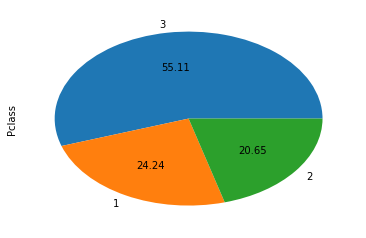

In [1723]:
train_df['Pclass'].value_counts().plot.pie(autopct='%.2f')

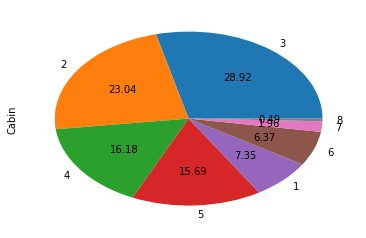

In [1724]:
cabin_train_df['Cabin'].value_counts().plot.pie(autopct='%.2f')

### Apply Over-sampling to fix imbalance

In [1725]:
cabin_full = pd.concat([cabin_train_df, cabin_test_df], sort = True, axis=0)
cabin_full = cabin_full.drop(['Survived', 'PassengerId'], axis=1)
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
1,2,2,3,1,2,3,0,1,1,1,3
3,2,2,3,0,2,3,0,1,1,1,3
6,3,3,5,0,1,3,0,1,0,0,1
10,0,0,7,0,3,2,1,3,1,1,2
11,3,3,3,0,1,2,0,1,1,0,2


In [1726]:
cabin_full = cabin_full.reset_index()
del cabin_full['index']
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
0,2,2,3,1,2,3,0,1,1,1,3
1,2,2,3,0,2,3,0,1,1,1,3
2,3,3,5,0,1,3,0,1,0,0,1
3,0,0,7,0,3,2,1,3,1,1,2
4,3,3,3,0,1,2,0,1,1,0,2


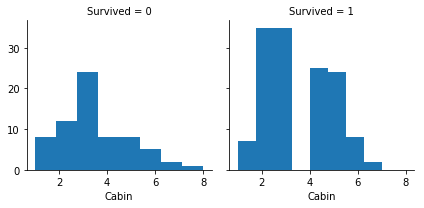

In [1727]:
g = sns.FacetGrid(cabin_train_df, col='Survived')
g.map(plt.hist, 'Cabin', bins=8)

### Models to predict Cabin values

In [1728]:
cabin_full.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Pclass,Sex,SibSp,Title
0,2,2,3,1,2,3,0,1,1,1,3
1,2,2,3,0,2,3,0,1,1,1,3
2,3,3,5,0,1,3,0,1,0,0,1
3,0,0,7,0,3,2,1,3,1,1,2
4,3,3,3,0,1,2,0,1,1,0,2


In [1729]:
X = cabin_full.loc[:, cabin_full.columns!='Pclass']
y = cabin_full['Pclass']

# RandomOverSampler for Pclass
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X,y)

In [1730]:
df = pd.DataFrame(X_res, columns=['Age', 'Age*Class', 'Cabin', 'Embarked','FamilySize','Fare', 'Parch', 'Sex', 'Sibsp', 'Title'])
df2 = pd.DataFrame(y_res, columns=['Pclass'])

In [1731]:
pd.crosstab(df['Cabin'], df2['Pclass'])

Pclass,1,2,3
Cabin,,,
1,22,0,0
2,65,0,0
3,94,0,0
4,40,60,0
5,34,49,51
6,0,147,126
7,0,0,79
8,1,0,0


In [1732]:
final_df = pd.concat([df, df2], axis=1)
final_df.head()

,Age,Age*Class,Cabin,Embarked,FamilySize,Fare,Parch,Sex,Sibsp,Title,Pclass
0,2,2,3,1,2,3,0,1,1,3,1
1,2,2,3,0,2,3,0,1,1,3,1
2,3,3,5,0,1,3,0,0,0,1,1
3,0,0,7,0,3,2,1,1,1,2,3
4,3,3,3,0,1,2,0,1,0,2,1


In [1733]:
X = final_df.loc[:, cabin_full.columns!='Cabin']
y = final_df['Cabin']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=10)

In [1734]:
smote = SMOTE(k_neighbors = 3)
X_train_smote, y_train_smote = smote.fit_sample(X_tr,y_tr)

In [1735]:
# k-NN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_tr, y_tr)
Y_pred = knn.predict(X_te)
acc_knn = round(knn.score(X_tr, y_tr) * 100, 2)
acc_knn

82.57

In [1736]:
# SMOTE k-NN
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_smote, y_train_smote)
Y_pred = knn.predict(X_te)
acc_knn = round(knn.score(X_train_smote, y_train_smote) * 100, 2)
acc_knn

83.6

In [1737]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=25)
random_forest.fit(X_tr, y_tr)
Y_pred = random_forest.predict(X_te)
random_forest.score(X_tr, y_tr)
acc_random_forest = round(random_forest.score(X_tr, y_tr) * 100, 2)
acc_random_forest

86.97

### Use Cabin model to fill in missing values

In [1738]:
for dataset in combine:   
    for idx, row in dataset.iterrows():
        if  dataset.loc[idx,'Cabin'] == 9:
            # Use Survival data to predict Cabin information
            # dataset.loc[idx,'Cabin'] = random_forest.predict(dataset.loc[idx:idx, ~train_df.columns.isin(['Cabin'])])
            # Don't use Survival data to predict Cabin information
            dataset.loc[idx,'Cabin'] = random_forest.predict(dataset.loc[idx:idx, ~train_df.columns.isin(['Cabin', 'Survived'])])

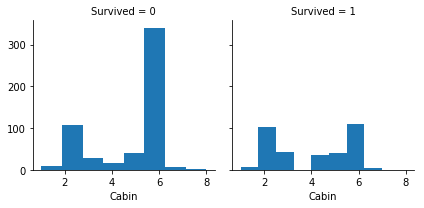

In [1739]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Cabin', bins=8)

In [1740]:
pd.crosstab(train_df['Pclass'], train_df['Cabin'])

Cabin,1,2,3,4,5,6,7,8
Pclass,,,,,,,,
1,15,67,59,29,26,18,1,1
2,0,84,5,20,17,58,0,0
3,0,59,7,2,37,375,11,0


### Uncomment if Cabin attribute should be excluded

In [1741]:
# train_df = train_df.drop("Cabin", axis = 1)
# test_df = test_df.drop("Cabin", axis = 1)

## Model, predict and solve

In [1742]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [1743]:
# Logistic Regression

logreg = LogisticRegression(solver='liblinear')
#logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.48

In [1744]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.196186
8,Title,0.497474
5,Fare,0.289742
7,Embarked,0.219225
6,Cabin,0.123261
4,Parch,-0.023853
9,FamilySize,-0.189422
10,Age*Class,-0.237207
3,SibSp,-0.333103
2,Age,-0.369374


In [1745]:
# Support Vector Machines
# The gamma argument only impacts SVM models that use the RBF, Polynomial, or Sigmoid kernel.

svc = SVC(gamma = 'auto')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.18

In [1767]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.46

In [1747]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In [1770]:
# Perceptron

perceptron = Perceptron(max_iter=5, tol=-np.infty)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.77

In [1772]:
# Linear SVC

# need to set LinearSVC(dual=False)incase the number of
# samples in your data is more than the number of features.
# The original config of LinearSVC sets dual to True
# because its for solving the dual problem.

linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.59

In [1750]:
# Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=15, tol=-np.infty)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.12

In [1764]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.3805

In [1765]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.3805

### Model evaluation

In [1773]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.3805
8,Decision Tree,87.3805
1,KNN,85.4600
0,Support Vector Machines,84.1800
7,Linear SVC,81.5900
2,Logistic Regression,81.4800
6,Stochastic Gradient Decent,79.1200
4,Naive Bayes,78.4500
5,Perceptron,76.7700
